# Exploring Dandiset 001354: Hippocampal Neuronal Responses to PAGER Activation

> **Note**: This notebook was generated with the assistance of AI. Please be cautious when interpreting the code or results and verify key findings independently.

## Overview

This notebook explores [Dandiset 001354](https://dandiarchive.org/dandiset/001354/0.250312.0036), which contains intracellular electrophysiological recordings from mouse hippocampal CA1 neurons. The recordings capture neuronal responses to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). Neurons were transfected with AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were recorded following application of either DCZ (100 nM) or DCZ + soluble mCherry (1 uM).

In this notebook, we will:
1. Explore the metadata and structure of the Dandiset
2. Examine the contents of NWB files in the dataset
3. Visualize responses from hippocampal neurons to PAGER activation
4. Compare current responses across different experimental conditions

## Required Packages

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## Exploring the Dandiset Metadata

In [2]:
# Initialize DANDI API client and access the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")
metadata = dandiset.get_raw_metadata()

# Print basic information about the Dandiset
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset version: {metadata['version']}")
print(f"Dandiset DOI: {metadata['doi']}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Dandiset version: 0.250312.0036
Dandiset DOI: 10.48324/dandi.001354/0.250312.0036


Let's examine some additional metadata to better understand the contents of this dataset:

In [3]:
# Extract and display key metadata
print(f"Description: {metadata['description'][:500]}...\n")
print(f"Keywords: {', '.join(metadata['keywords'])}\n")
print(f"Study target: {metadata['studyTarget'][0]}\n")
print(f"Protocol: {metadata['protocol'][0]}\n")

# Display information about the subjects and data types
assets_summary = metadata['assetsSummary']
print(f"Number of subjects: {assets_summary['numberOfSubjects']}")
print(f"Number of cells: {assets_summary['numberOfCells']}")
print(f"Number of files: {assets_summary['numberOfFiles']}")
print(f"Measurement technique: {assets_summary['measurementTechnique'][0]['name']}")
print(f"Data standard: {assets_summary['dataStandard'][0]['name']}")
print(f"Species: {assets_summary['species'][0]['name']}")

Description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, th...

Keywords: CA1, PAGER, Chemogenetics, Antigen-gated

Study target: To validate the use of programmable antigen-gated G-protein-coupled engineered receptors to allow targeted modulation of neuronal activity.

Protocol: https://doi.org/10.1038/s41586-024-08282-3

Number of subjects: 8
Number of cells: 50
Number of files: 50
Measurement technique: current clamp technique
Data standard: Neurodata Without Borders (NWB)
Species: Mus musculus - House mouse


## Browsing NWB Files in the Dandiset

In [4]:
# List the first 10 assets in the Dandiset to see the file structure
assets = list(dandiset.get_assets())[:10]
for i, asset in enumerate(assets):
    print(f"{i+1}. {asset.path}")

1. sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb
2. sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
3. sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb
4. sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb
5. sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb
6. sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb
7. sub-PK-110/sub-PK-110_ses-20240723T195515_slice-2024-07-23-0017_cell-2024-07-23-0017_icephys.nwb
8. sub-PK-110/sub-PK-110_ses-20240723T143352_slice-2024-07-23-0003_cell-2024-07-23-0003_icephys.nwb
9. sub-PK-110/sub-PK-110_ses-20240723T185020_slice-2024-07-23-0014_cell-2024-07-23-0014_icephys.nwb
10. sub-PK-110/sub-PK-110_ses-20240723T160020_slice-2024-07-23-0006_cell-2024-07-23-0006_icephys.nwb

The files appear to be organized by subject (e.g., sub-PK-109, sub-PK-110), with each file containing data from a single cell recording session.

Let's examine how many files are available for each subject:

In [5]:
# Group files by subject
all_assets = list(dandiset.get_assets())
subjects = {}
for asset in all_assets:
    subject_id = asset.path.split('/')[0]
    if subject_id not in subjects:
        subjects[subject_id] = []
    subjects[subject_id].append(asset.path)

# Print the number of files per subject
for subject, files in subjects.items():
    print(f"{subject}: {len(files)} files")

sub-PK-109: 5 files
sub-PK-110: 5 files
sub-PK-113: 6 files
sub-PK-114: 7 files
sub-PK-115: 3 files
sub-PK-116: 9 files
sub-PK-119: 7 files
sub-PK-120: 8 files


## Loading and Examining a Single NWB File

In [6]:
# Select a file from sub-PK-109 to examine in detail
file_path = "sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb"
asset = next(dandiset.get_assets_by_glob(file_path))

# Stream the file without downloading it
remote_file = remfile.File(asset.download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the file
print(f"File identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


File identifier: pk2024_07_17_0009
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 18:07:19-07:00
Subject ID: PK-109
Subject sex: F
Subject species: Mus musculus


## Understanding the NWB Data Structure

Let's examine the structure of the NWB file to understand what data it contains:

In [7]:
# Examine the lab metadata to understand more about the recording
lab_meta_data = nwb.lab_meta_data["DandiIcephysMetadata"]
print(f"Cell ID: {lab_meta_data.cell_id}")
print(f"Slice ID: {lab_meta_data.slice_id}")
print(f"Targeted layer: {lab_meta_data.targeted_layer}")
print(f"Inferred layer: {lab_meta_data.inferred_layer or 'Not specified'}")

# Check the available electrodes
print("\nElectrodes:")
for electrode_id, electrode in nwb.icephys_electrodes.items():
    print(f"  {electrode_id}: {electrode.device}")

Cell ID: 2024_07_17_0009
Slice ID: 2024_07_17_0009
Targeted layer: CA1
Inferred layer: Not specified

Electrodes:
  electrode-0: DeviceIcephys pynwb.device.Device at 0x140686469701520
Fields:
  description: no description

  electrode-1: DeviceIcephys pynwb.device.Device at 0x140686469701520
Fields:
  description: no description



Now, let's explore the acquisition and stimulus data available in the file:

In [8]:
# List acquisition data (responses)
print("Acquisition data:")
for i, (key, _) in enumerate(nwb.acquisition.items()):
    if i < 10:  # Limit to first 10 to avoid cluttering output
        print(f"  {key}")
    elif i == 10:
        print(f"  ... and {len(nwb.acquisition) - 10} more items")
        break

# List stimulus data
print("\nStimulus data:")
for i, (key, _) in enumerate(nwb.stimulus.items()):
    if i < 10:  # Limit to first 10 to avoid cluttering output
        print(f"  {key}")
    elif i == 10:
        print(f"  ... and {len(nwb.stimulus) - 10} more items")
        break

Acquisition data:
  current_clamp-response-01-ch-0
  current_clamp-response-01-ch-1
  current_clamp-response-02-ch-0
  current_clamp-response-02-ch-1
  current_clamp-response-03-ch-0
  current_clamp-response-03-ch-1
  current_clamp-response-04-ch-0
  current_clamp-response-04-ch-1
  current_clamp-response-05-ch-0
  current_clamp-response-05-ch-1
  ... and 614 more items

Stimulus data:
  stimulus-01-ch-0
  stimulus-01-ch-1
  stimulus-02-ch-0
  stimulus-02-ch-1
  stimulus-03-ch-0
  stimulus-03-ch-1
  stimulus-04-ch-0
  stimulus-04-ch-1
  stimulus-05-ch-0
  stimulus-05-ch-1
  ... and 614 more items


Let's examine the properties of a sample acquisition (response) data series:

In [9]:
# Examine a sample response data
response_series = nwb.acquisition["current_clamp-response-01-ch-0"]
print(f"Data description: {response_series.description}")
print(f"Starting time: {response_series.starting_time} {response_series.starting_time_unit}")
print(f"Sampling rate: {response_series.rate} Hz")
print(f"Data shape: {response_series.data.shape}")
print(f"Data unit: {response_series.unit}")
print(f"Conversion factor: {response_series.conversion}")

Data description: Response to: ramp
Starting time: 0.0 seconds
Sampling rate: 20000.0 Hz
Data shape: (100000,)
Data unit: volts
Conversion factor: 3.051757880712104e-05


And the properties of a corresponding stimulus series:

In [10]:
# Examine a sample stimulus data
stimulus_series = nwb.stimulus["stimulus-01-ch-0"]
print(f"Data description: {stimulus_series.description}")
print(f"Starting time: {stimulus_series.starting_time} {stimulus_series.starting_time_unit}")
print(f"Sampling rate: {stimulus_series.rate} Hz")
print(f"Data shape: {stimulus_series.data.shape}")
print(f"Data unit: {stimulus_series.unit}")
print(f"Conversion factor: {stimulus_series.conversion}")

Data description: Stim type: ramp
Starting time: 0.0 seconds
Sampling rate: 20000.0 Hz
Data shape: (100000,)
Data unit: amperes
Conversion factor: 1e-12


## Visualizing Electrophysiological Responses

Let's visualize the electrophysiological responses from a single trial:

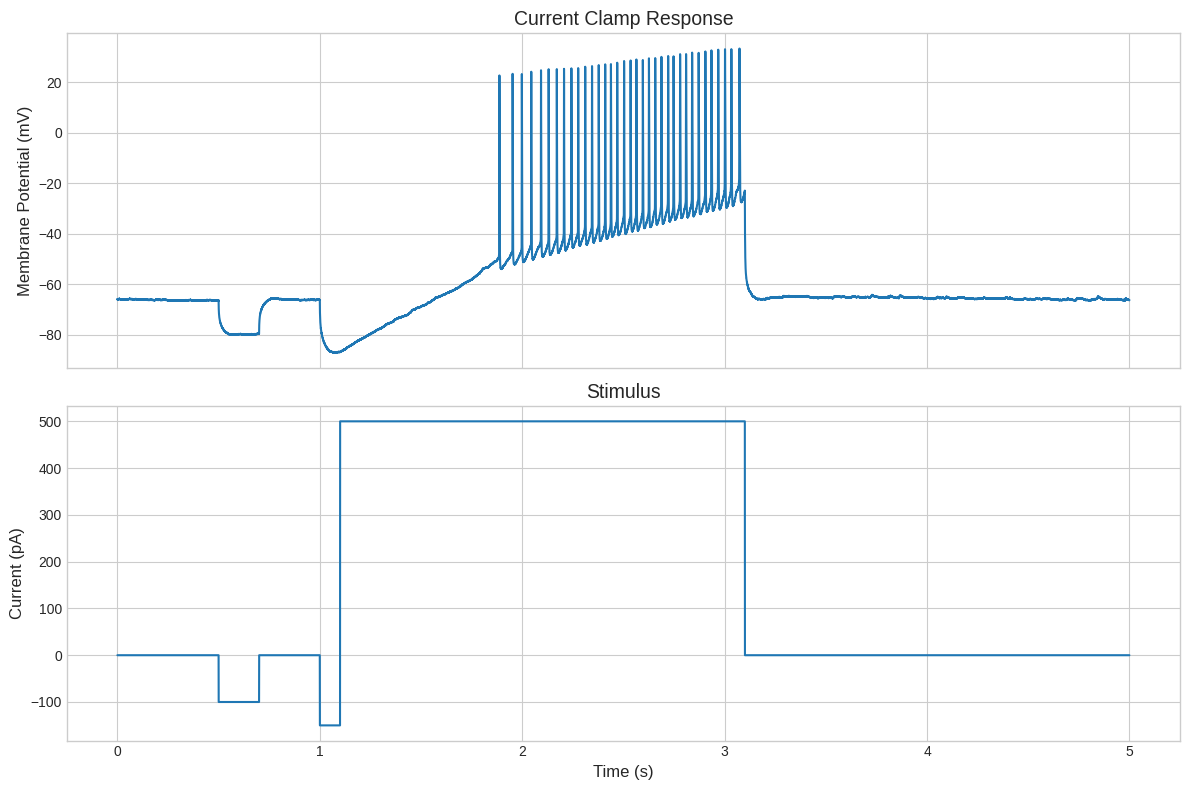

In [11]:
# Plot stimulus and response for a single trial
time_idx = int(5.0 * response_series.rate)  # 5 seconds
time_range = np.arange(0, time_idx) / response_series.rate  # Time in seconds

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot response
response_data = response_series.data[:time_idx] * response_series.conversion  # Convert to volts
axs[0].plot(time_range, response_data * 1000)  # Convert to millivolts
axs[0].set_ylabel('Membrane Potential (mV)')
axs[0].set_title('Current Clamp Response')

# Plot stimulus
stimulus_data = stimulus_series.data[:time_idx] * stimulus_series.conversion  # Convert to amperes
axs[1].plot(time_range, stimulus_data * 1e12)  # Convert to picoamperes
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Current (pA)')
axs[1].set_title('Stimulus')

plt.tight_layout()
plt.show()

Now, let's compare the responses from multiple trials to see if there are any differences across time:

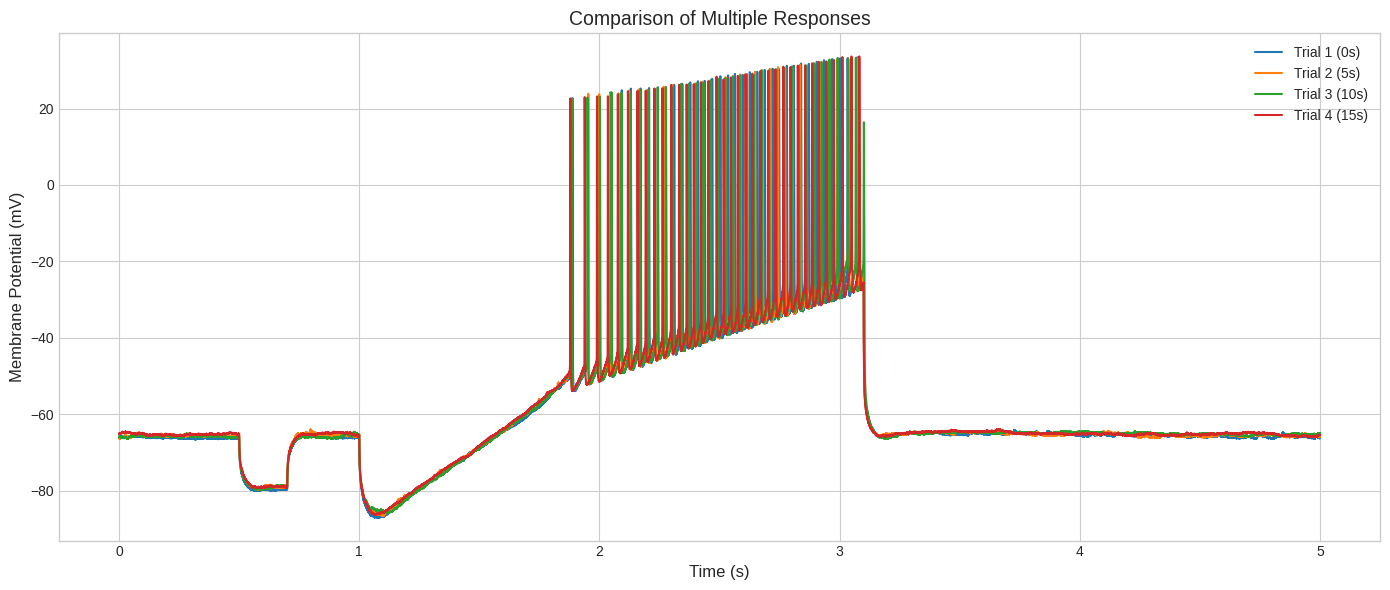

In [12]:
# Compare multiple response traces
trials = [
    ("Trial 1 (0s)", "current_clamp-response-01-ch-0"),
    ("Trial 2 (5s)", "current_clamp-response-02-ch-0"),
    ("Trial 3 (10s)", "current_clamp-response-03-ch-0"),
    ("Trial 4 (15s)", "current_clamp-response-04-ch-0")
]

plt.figure(figsize=(14, 6))

for label, response_key in trials:
    response_series = nwb.acquisition[response_key]
    time_idx = int(5.0 * response_series.rate)  # 5 seconds
    time_range = np.arange(0, time_idx) / response_series.rate  # Time in seconds
    response_data = response_series.data[:time_idx] * response_series.conversion * 1000  # Convert to mV
    
    plt.plot(time_range, response_data, label=label)

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Comparison of Multiple Responses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's also look at how the stimuli compare across the trials:

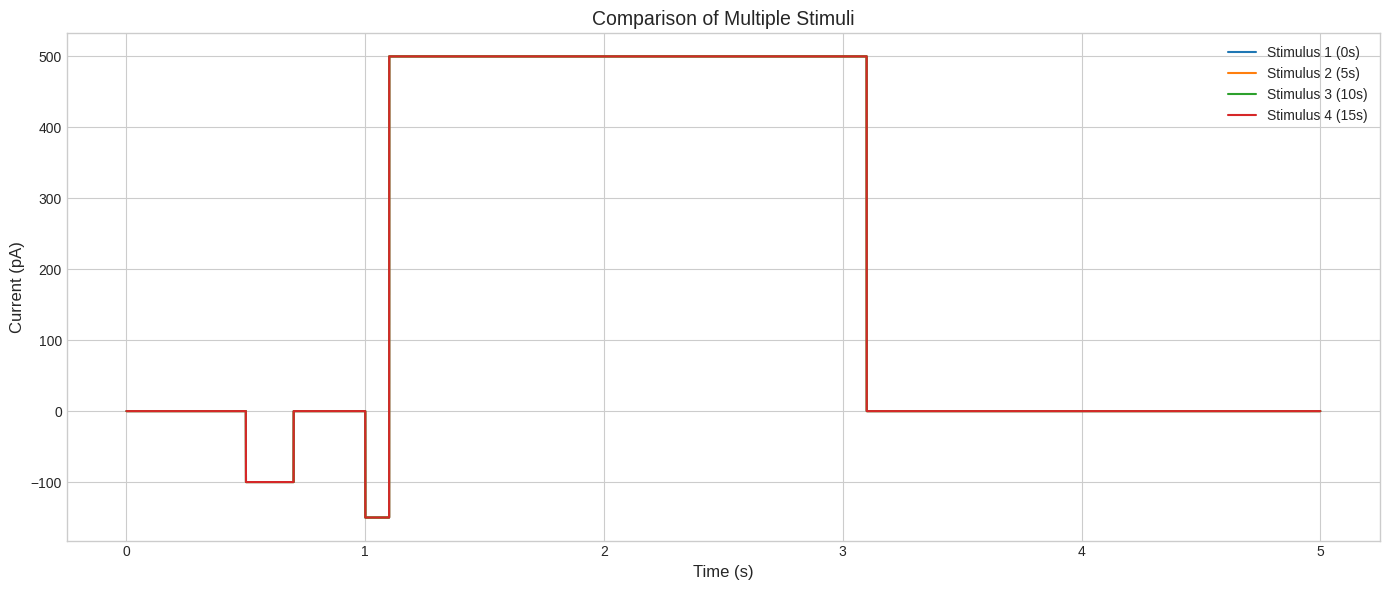

In [13]:
# Compare multiple stimulus traces
stimulus_trials = [
    ("Stimulus 1 (0s)", "stimulus-01-ch-0"),
    ("Stimulus 2 (5s)", "stimulus-02-ch-0"),
    ("Stimulus 3 (10s)", "stimulus-03-ch-0"),
    ("Stimulus 4 (15s)", "stimulus-04-ch-0")
]

plt.figure(figsize=(14, 6))

for label, stim_key in stimulus_trials:
    stim_series = nwb.stimulus[stim_key]
    time_idx = int(5.0 * stim_series.rate)  # 5 seconds
    time_range = np.arange(0, time_idx) / stim_series.rate  # Time in seconds
    stim_data = stim_series.data[:time_idx] * stim_series.conversion * 1e12  # Convert to pA
    
    plt.plot(time_range, stim_data, label=label)

plt.xlabel('Time (s)')
plt.ylabel('Current (pA)')
plt.title('Comparison of Multiple Stimuli')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyzing Response Properties

Let's calculate some basic properties of the responses:

In [14]:
# Function to calculate basic response properties
def analyze_response(response_series, time_window=5.0):
    time_idx = int(time_window * response_series.rate)
    data = response_series.data[:time_idx] * response_series.conversion * 1000  # Convert to mV
    
    # Basic statistics
    baseline = np.mean(data[:int(0.5 * response_series.rate)])  # First 0.5 seconds as baseline
    peak = np.max(data) if np.max(data) - baseline > abs(np.min(data) - baseline) else np.min(data)
    peak_amplitude = peak - baseline
    
    return {
        'baseline': baseline,
        'peak': peak,
        'peak_amplitude': peak_amplitude,
    }

# Analyze multiple response trials
results = []
for i in range(1, 5):
    response_key = f"current_clamp-response-0{i}-ch-0"
    response_series = nwb.acquisition[response_key]
    analysis = analyze_response(response_series)
    results.append({
        'trial': i,
        'time': (i-1) * 5.0,  # Trials are at 0s, 5s, 10s, 15s
        **analysis
    })

# Display results
for result in results:
    print(f"Trial {result['trial']} (t={result['time']}s):")
    print(f"  Baseline: {result['baseline']:.2f} mV")
    print(f"  Peak: {result['peak']:.2f} mV")
    print(f"  Peak amplitude: {result['peak_amplitude']:.2f} mV")
    print()

Trial 1 (t=0.0s):
  Baseline: -66.14 mV
  Peak: 33.39 mV
  Peak amplitude: 99.53 mV

Trial 2 (t=5.0s):
  Baseline: -65.57 mV
  Peak: 33.08 mV
  Peak amplitude: 98.65 mV

Trial 3 (t=10.0s):
  Baseline: -65.76 mV
  Peak: 33.23 mV
  Peak amplitude: 98.99 mV

Trial 4 (t=15.0s):
  Baseline: -65.17 mV
  Peak: 33.63 mV
  Peak amplitude: 98.80 mV



Let's visualize these response properties over time:

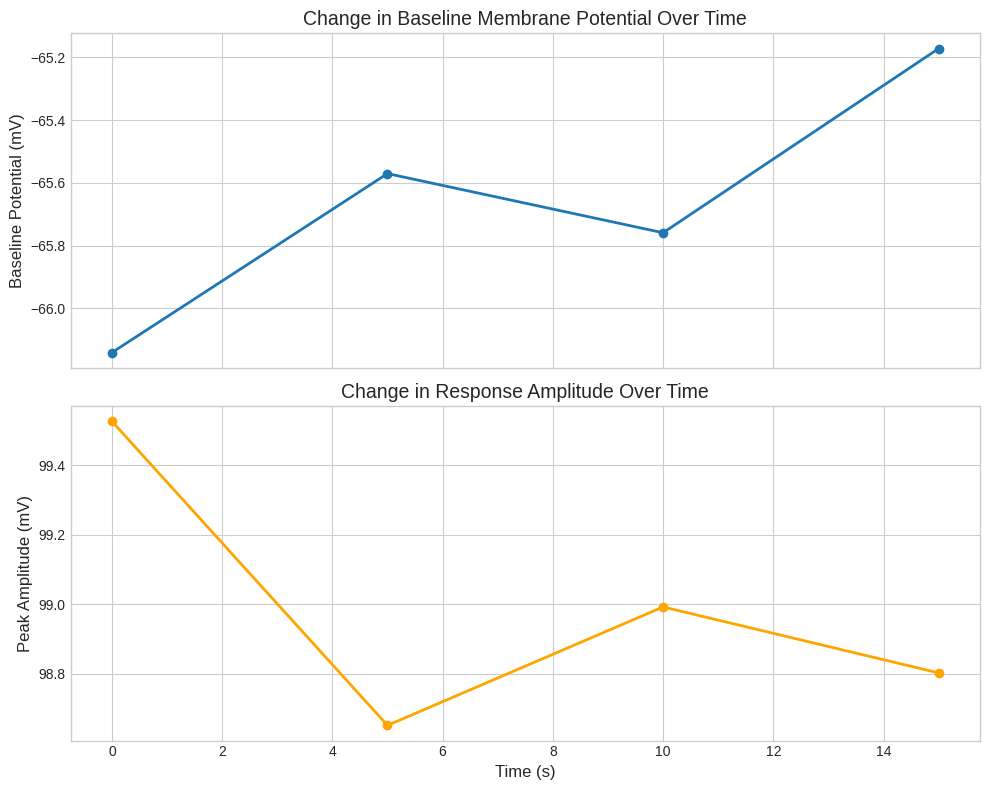

In [15]:
# Plot how response properties change over time
times = [result['time'] for result in results]
baselines = [result['baseline'] for result in results]
amplitudes = [result['peak_amplitude'] for result in results]

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].plot(times, baselines, 'o-', linewidth=2)
axs[0].set_ylabel('Baseline Potential (mV)')
axs[0].set_title('Change in Baseline Membrane Potential Over Time')
axs[0].grid(True)

axs[1].plot(times, amplitudes, 'o-', linewidth=2, color='orange')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Peak Amplitude (mV)')
axs[1].set_title('Change in Response Amplitude Over Time')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Examining Intracellular Recording Tables

The NWB file contains tables that organize the relationships between stimuli and responses. Let's examine them:

In [16]:
# Check the tables that organize the recordings
print("Intracellular Recordings Table:")
print(f"Number of rows: {len(nwb.intracellular_recordings.id)}")

print("\nSimultaneous Recordings Table:")
print(f"Number of rows: {len(nwb.icephys_simultaneous_recordings.id)}")
print(f"Columns: {nwb.icephys_simultaneous_recordings.colnames}")

print("\nSequential Recordings Table:")
print(f"Number of rows: {len(nwb.icephys_sequential_recordings.id)}")
print(f"Columns: {nwb.icephys_sequential_recordings.colnames}")

Intracellular Recordings Table:
Number of rows: 624

Simultaneous Recordings Table:
Number of rows: 312
Columns: ('recordings',)

Sequential Recordings Table:
Number of rows: 1
Columns: ('simultaneous_recordings', 'stimulus_type')


## Comparing Responses Across Different Files

Let's compare responses from different cells to see the variability in PAGER activation effects:

In [17]:
# Function to load and extract response data from a file
def get_response_data(file_path):
    asset = next(dandiset.get_assets_by_glob(file_path))
    remote_file = remfile.File(asset.download_url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    
    # Get metadata
    cell_id = nwb.lab_meta_data["DandiIcephysMetadata"].cell_id
    
    # Get first response
    response_key = "current_clamp-response-01-ch-0"
    if response_key in nwb.acquisition:
        response_series = nwb.acquisition[response_key]
        time_idx = int(5.0 * response_series.rate)  # 5 seconds
        time_range = np.arange(0, time_idx) / response_series.rate
        response_data = response_series.data[:time_idx] * response_series.conversion * 1000  # Convert to mV
        
        return {
            'cell_id': cell_id,
            'subject_id': nwb.subject.subject_id,
            'time': time_range,
            'response': response_data
        }
    
    return None

Now, let's load data from a few different cells and compare their responses:

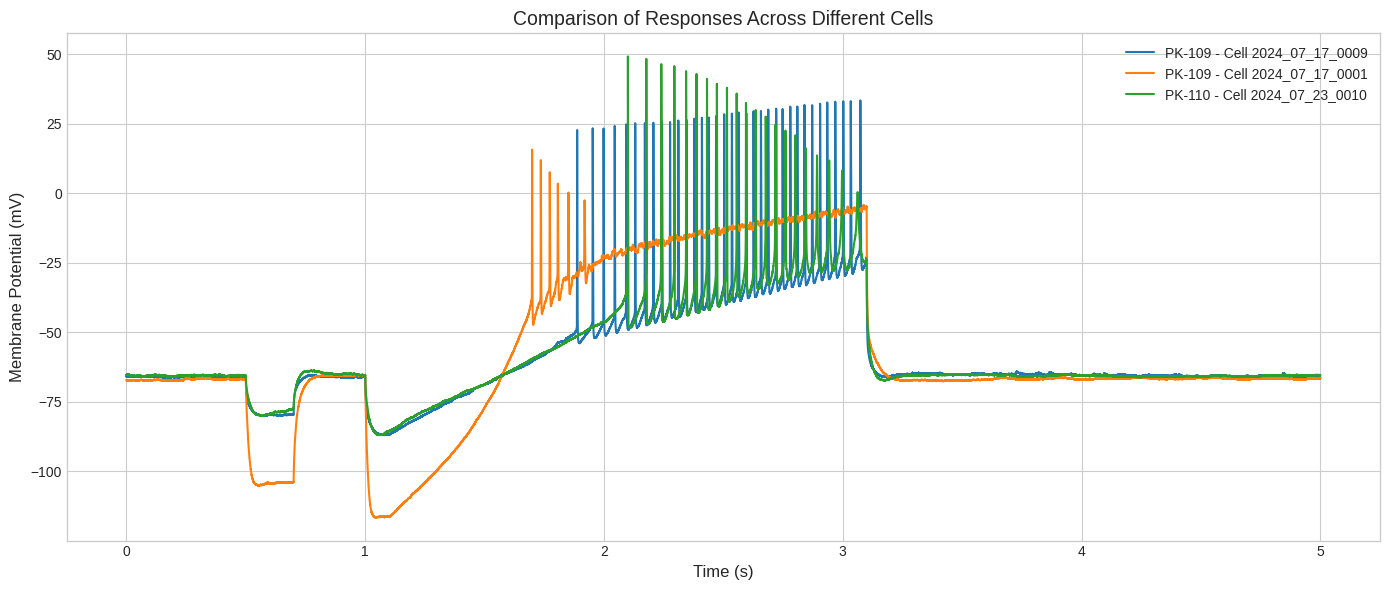

In [18]:
# Compare responses from different cells
file_paths = [
    "sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb",
    "sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb",
    "sub-PK-110/sub-PK-110_ses-20240723T173444_slice-2024-07-23-0010_cell-2024-07-23-0010_icephys.nwb"
]

responses = []
for file_path in file_paths:
    response_data = get_response_data(file_path)
    if response_data:
        responses.append(response_data)

# Plot comparison
plt.figure(figsize=(14, 6))

for response in responses:
    plt.plot(response['time'], response['response'], 
             label=f"{response['subject_id']} - Cell {response['cell_id']}")

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Comparison of Responses Across Different Cells')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analyzing Response Variability

In [19]:
# Calculate statistics for each cell
response_stats = []

for response in responses:
    data = response['response']
    baseline = np.mean(data[:int(0.5 * len(data) / response['time'][-1])])  # First 0.5 seconds
    peak = np.max(data) if np.max(data) - baseline > abs(np.min(data) - baseline) else np.min(data)
    peak_amplitude = peak - baseline
    
    response_stats.append({
        'cell_id': response['cell_id'],
        'subject_id': response['subject_id'],
        'baseline': baseline,
        'peak_amplitude': peak_amplitude,
        'std_dev': np.std(data)
    })

# Display statistics
for stat in response_stats:
    print(f"{stat['subject_id']} - Cell {stat['cell_id']}:")
    print(f"  Baseline: {stat['baseline']:.2f} mV")
    print(f"  Peak amplitude: {stat['peak_amplitude']:.2f} mV")
    print(f"  Standard deviation: {stat['std_dev']:.2f} mV")
    print()

PK-109 - Cell 2024_07_17_0009:
  Baseline: -66.14 mV
  Peak amplitude: 99.53 mV
  Standard deviation: 17.22 mV

PK-109 - Cell 2024_07_17_0001:
  Baseline: -67.02 mV
  Peak amplitude: 82.71 mV
  Standard deviation: 28.83 mV

PK-110 - Cell 2024_07_23_0010:
  Baseline: -65.53 mV
  Peak amplitude: 114.75 mV
  Standard deviation: 17.03 mV



## Summary

In this notebook, we explored Dandiset 001354, which contains intracellular electrophysiological recordings from mouse hippocampal CA1 neurons responding to PAGER activation. We:

1. Examined the metadata and structure of the Dandiset
2. Explored the contents of individual NWB files
3. Visualized neural responses from current clamp recordings
4. Compared responses across different trials and cells
5. Analyzed basic response properties

Future explorations could include:
- More detailed analysis of response kinetics
- Comparison between DCZ alone vs. DCZ + soluble mCherry conditions
- Analysis of dose-response relationships
- Investigation of response variability across a larger sample of cells